In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix


In [2]:
#getting the cleaned dataset
dataset = pd.read_csv("Clean2019Data.csv")
dataset.shape

(255176, 20)

In [3]:
train, test = train_test_split(dataset, test_size = 0.2)

In [4]:
train_predictors = train.iloc[:,1:]
train_response = train[['HeartDiseaseorAttack']]
train_response.shape

test_predictors = test.iloc[:,1:]
test_response = test[['HeartDiseaseorAttack']]
test_response.shape

(51036, 1)

In [5]:
#labelling our 1 predictor + 1 response
#followed by splitting into train test set
GenHealth_train = pd.DataFrame(train_predictors['GenHealth'])
GenHealth_test = pd.DataFrame(test_predictors['GenHealth'])

HD_train = train_response
HD_test = test_response

# Using 1 Predictor (Logistic Regression)


In [6]:
#saving logisticregression function to a variable and fitting it
lr = LogisticRegression()
lr.fit(GenHealth_train, HD_train.values.ravel())


LogisticRegression()

In [7]:
#finding out the score of the fit
lr.score(GenHealth_train, HD_train)

0.9100323307534045

<AxesSubplot:>

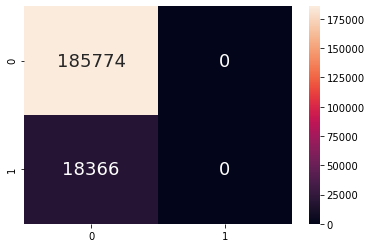

In [8]:
#using confusion matrix to see the true positive rates etc. via heatmap
HD_predict = lr.predict(GenHealth_train)
cm = confusion_matrix(HD_train, HD_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18})

#### We can see that by using one predictor we are unable to get any true positive. 

# Using All Predictors (Logistic Regression)


In [9]:
#same as above, but splitting the whole dataset into train test set instead of response + variable
lr = LogisticRegression(solver = 'lbfgs', max_iter= 254972)


In [10]:
train_response.shape

(204140, 1)

In [11]:
#finding out score of the fit on train set using all predictors
lr.fit(train_predictors, train_response.values.ravel())
print(f"Logistic Regression with all Predictors gives a score of {lr.score(train_predictors, train_response)} for the train set.")

Logistic Regression with all Predictors gives a score of 0.911864406779661 for the train set.


In [12]:
#finding out score of the fit on TEST set using all predictors
LR_noOver_score = lr.score(test_predictors, test_response)
print(f"Logistic Regression with all Predictors gives a score of {lr.score(test_predictors, test_response)} for the test set.")

Logistic Regression with all Predictors gives a score of 0.9113566893957207 for the test set.


<AxesSubplot:>

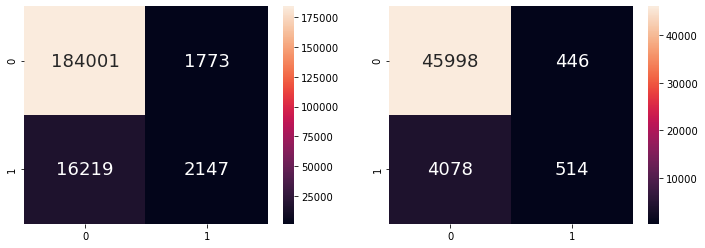

In [13]:
#checking out the confusion matrix on TRAIN set
f, axes = plt.subplots(1, 2, figsize=(12, 4))

#confusion matrix heatmap again to check true positives
HD_predict = lr.predict(train_predictors)
cm = confusion_matrix(train_response, HD_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

HD_test_predict = lr.predict(test_predictors)
cm_LR_noOver = confusion_matrix(test_response, HD_test_predict)
sb.heatmap(cm_LR_noOver, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [14]:
CM_test = confusion_matrix(test_response, HD_test_predict)

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

TPR = TP/(TP+FN)

LR_noOver_tpr = TPR[1]

print(f"The true positive rate is: {LR_noOver_tpr}")

The true positive rate is: 0.11193379790940766


# Using All Predictors (Decision tree)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.910914078573528

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9110823732267419



<AxesSubplot:>

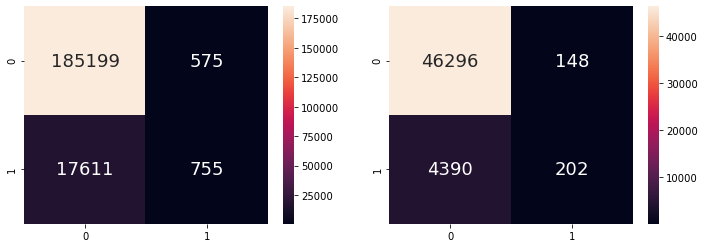

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

train_predictors = train.iloc[:,1:]
train_response = train[['HeartDiseaseorAttack']]

test_predictors = test.iloc[:,1:]
test_response = test[['HeartDiseaseorAttack']]

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(train_predictors, train_response)    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(train_predictors)
y_test_pred = dectree.predict(test_predictors)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(train_predictors, train_response))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
DT_noOver_score = dectree.score(test_predictors, test_response)
print("Classification Accuracy \t:", DT_noOver_score)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(train_response, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

cm_DT_noOver = confusion_matrix(test_response, y_test_pred)
sb.heatmap(cm_DT_noOver, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [16]:
CM_test = confusion_matrix(test_response, y_test_pred)

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

DT_noOver_tpr = TPR[1]

print(f"The true positive rate is: {DT_noOver_tpr}")

The true positive rate is: 0.043989547038327526


# Using all predictors (Random Forest Regression)

In [17]:
#saving RandomForestClassifier function into variable rfc
#fitting the model + finding out how well it fits on TRAIN set
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(train_predictors, train_response.values.ravel())
rfc.score(train_predictors, train_response)

0.9867884784951504

In [18]:
#fitting the model + finding out how well it fit on the TEST set
rf_noOver_score = rfc.score(test_predictors, test_response)
rfc.score(test_predictors, test_response)

0.9036170546281056

<AxesSubplot:>

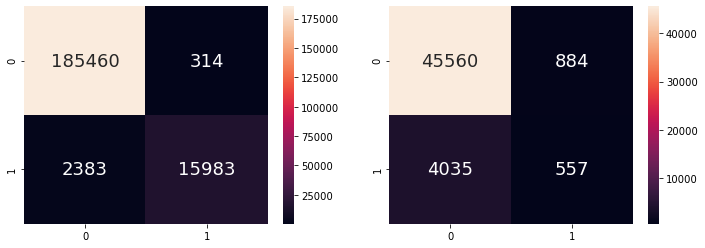

In [19]:
#checking out the confusion matrix on TRAIN set
f, axes = plt.subplots(1, 2, figsize=(12, 4))

HD_predict = rfc.predict(train_predictors)
cm = confusion_matrix(train_response, HD_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

HD_test_predict = rfc.predict(test_predictors)
rf_noOver = confusion_matrix(test_response, HD_test_predict)
sb.heatmap(rf_noOver, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [20]:
FP = rf_noOver.sum(axis=0) - np.diag(rf_noOver)  
FN = rf_noOver.sum(axis=1) - np.diag(rf_noOver)
TP = np.diag(rf_noOver)
TN = rf_noOver.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

rf_noOver_tpr = TPR[1]

print(f"The true positive rate is: {rf_noOver_tpr}")

The true positive rate is: 0.12129790940766551


# Using all Predictors (Support Vector Classification with C=1.0)

In [21]:
from sklearn import preprocessing
train_predictors = preprocessing.scale(train_predictors) # Preprocessing is to standardise the set
train_predictors.shape

(204140, 19)

In [22]:
#saving function LinearSVC as svc
#fitting + finding out score on TRAIN set
svc = LinearSVC(C=1.0, max_iter=203977)
svc.fit(train_predictors, train_response.values.ravel())
svc.score(train_predictors, train_response)

0.9114235328695993

In [23]:
#fitting + finding out score on TEST set
test_predictors = preprocessing.scale(test_predictors)
svc_noOver_score = svc.score(test_predictors, test_response)
svc.score(test_predictors, test_response)

0.9114742534681401

<AxesSubplot:>

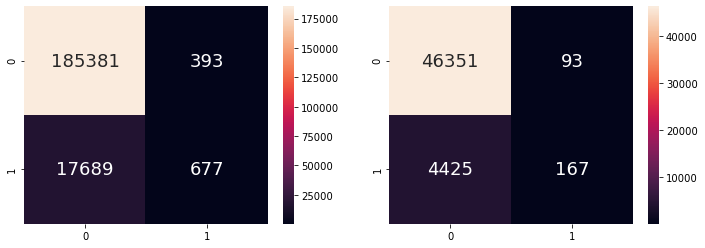

In [24]:
#checking out the confusion matrix on TRAIN set
f, axes = plt.subplots(1, 2, figsize=(12, 4))

HD_predict = svc.predict(train_predictors)
cm = confusion_matrix(train_response, HD_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

HD_test_predict = svc.predict(test_predictors)
svc_noOver = confusion_matrix(test_response, HD_test_predict)
sb.heatmap(svc_noOver, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [25]:
FP = svc_noOver.sum(axis=0) - np.diag(svc_noOver)  
FN = svc_noOver.sum(axis=1) - np.diag(svc_noOver)
TP = np.diag(svc_noOver)
TN = svc_noOver.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

svc_noOver_tpr = TPR[1]

print(f"The true positive rate is: {svc_noOver_tpr}")

The true positive rate is: 0.03636759581881533


# Using all Predictors Decision tree with no oversampling

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.910914078573528

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9110823732267419



<AxesSubplot:>

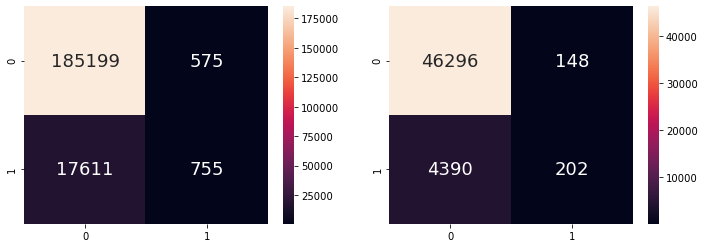

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

train_predictors = train.iloc[:,1:]
train_response = train[['HeartDiseaseorAttack']]

test_predictors = test.iloc[:,1:]
test_response = test[['HeartDiseaseorAttack']]

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(train_predictors, train_response)    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(train_predictors)
y_test_pred = dectree.predict(test_predictors)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(train_predictors, train_response))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
DT_noOver_score = dectree.score(test_predictors, test_response)
print("Classification Accuracy \t:", DT_noOver_score)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(train_response, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

cm_DT_noOver = confusion_matrix(test_response, y_test_pred)
sb.heatmap(cm_DT_noOver, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Creating oversampling data

In [27]:
HD_0, HD_1 = train['HeartDiseaseorAttack'].value_counts()

HD_class_0 = train[train['HeartDiseaseorAttack'] == 0]
HD_class_1 = train[train['HeartDiseaseorAttack'] == 1]

print(f"No Heart Disease: {HD_0}")
print(f"Has Heart Disease: {HD_1}")

# Oversample people with heart disease for test case
df_class_1_over = HD_class_1.sample(HD_0, replace=True)
df_test_over = pd.concat([HD_class_0, df_class_1_over], axis=0)

df_test_over.shape

No Heart Disease: 185774
Has Heart Disease: 18366


(371548, 20)

In [28]:
df_test_over['HeartDiseaseorAttack'].value_counts()

0.0    185774
1.0    185774
Name: HeartDiseaseorAttack, dtype: int64

In [29]:
X_train = df_test_over.iloc[:,1:]
y_train = df_test_over[['HeartDiseaseorAttack']]

X_test = test.iloc[:,1:]
y_test = test[['HeartDiseaseorAttack']]

# Logistic Regression with oversampling

Logistic Regression gives a score of 0.7713754346679299 for the train set.
Logistic Regression gives a score of 0.7523120934242495 for the test set.


<AxesSubplot:>

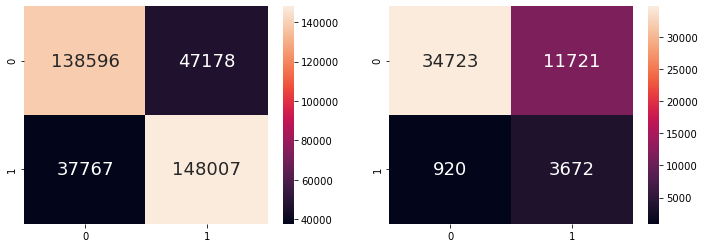

In [30]:
train_predictors = X_train
train_response = y_train

test_predictors = X_test
test_response = y_test

lr.fit(train_predictors, train_response.values.ravel())
print(f"Logistic Regression gives a score of {lr.score(train_predictors, train_response)} for the train set.")


LR_Over_score = lr.score(test_predictors, test_response)
print(f"Logistic Regression gives a score of {LR_Over_score} for the test set.")

f, axes = plt.subplots(1, 2, figsize=(12, 4))

HD_train_predict = lr.predict(train_predictors)
cm = confusion_matrix(train_response, HD_train_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

HD_test_predict = lr.predict(test_predictors)
cm_LR_over = confusion_matrix(test_response, HD_test_predict)
sb.heatmap(cm_LR_over, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [31]:
CM_test = confusion_matrix(test_response, HD_test_predict)

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

LR_Over_tpr = TPR[1]

print(f"The true positive rate is: {LR_Over_tpr}")

The true positive rate is: 0.7996515679442509


## Random Forest with Oversampling

Random Forest gives a score of 0.9789044753302399 for the train set.
Random Forest gives a score of 0.8745199467042871 for the test set.


<AxesSubplot:>

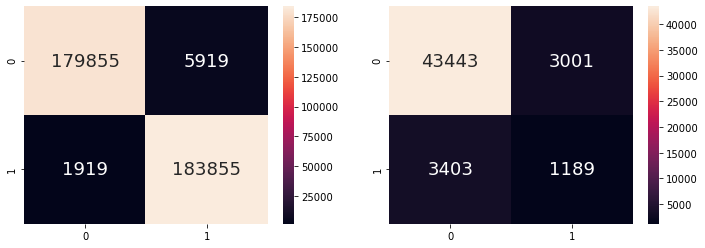

In [32]:
rfc.fit(train_predictors, train_response.values.ravel())
print(f"Random Forest gives a score of {rfc.score(train_predictors, train_response)} for the train set.")

rf_Over_score = rfc.score(test_predictors, test_response)
print(f"Random Forest gives a score of {rf_Over_score} for the test set.")

f, axes = plt.subplots(1, 2, figsize=(12, 4))

HD_predict = rfc.predict(train_predictors)
cm = confusion_matrix(train_response, HD_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

HD_test_predict = rfc.predict(test_predictors)
rf_Over = confusion_matrix(test_response, HD_test_predict)
sb.heatmap(rf_Over, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [33]:
FP = rf_Over.sum(axis=0) - np.diag(rf_Over)  
FN = rf_Over.sum(axis=1) - np.diag(rf_Over)
TP = np.diag(rf_Over)
TN = rf_Over.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

rf_Over_tpr = TPR[1]

print(f"The true positive rate is: {rf_Over_tpr}")

The true positive rate is: 0.25892857142857145


## SVC with Oversampling


In [34]:
train_predictors = preprocessing.scale(train_predictors) # Preprocessing is to standardise the set
test_predictors = preprocessing.scale(test_predictors)

SVC gives a score of 0.7709744097667058 for the train set.
SVC gives a score of 0.6019476447997492 for the test set.


<AxesSubplot:>

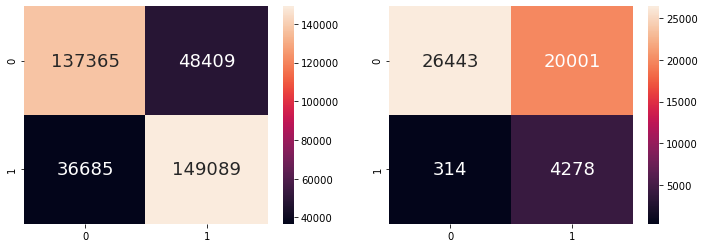

In [35]:
svc.fit(train_predictors, train_response.values.ravel())
print(f"SVC gives a score of {svc.score(train_predictors, train_response)} for the train set.")

svc_Over_score = svc.score(test_predictors, test_response)
print(f"SVC gives a score of {svc_Over_score} for the test set.")

f, axes = plt.subplots(1, 2, figsize=(12, 4))

HD_predict = svc.predict(train_predictors)
cm = confusion_matrix(train_response, HD_predict)
sb.heatmap(cm, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

HD_test_predict = svc.predict(test_predictors)
svc_Over = confusion_matrix(test_response, HD_test_predict)
sb.heatmap(svc_Over, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [36]:
FP = svc_Over.sum(axis=0) - np.diag(svc_Over)  
FN = svc_Over.sum(axis=1) - np.diag(svc_Over)
TP = np.diag(svc_Over)
TN = svc_Over.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

svc_Over_tpr = TPR[1]

print(f"The true positive rate is: {svc_Over_tpr}")

The true positive rate is: 0.9316202090592335


# Oversampling with decision tree

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7344273149095137

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6326710557253703



<AxesSubplot:>

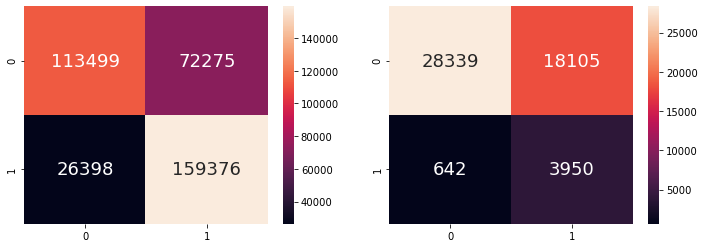

In [37]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
DT_Over_score = dectree.score(X_test, y_test)
print("Classification Accuracy \t:", DT_Over_score)
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

cm_DT_Over = confusion_matrix(y_test, y_test_pred)
sb.heatmap(cm_DT_Over, 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [38]:
CM_test = confusion_matrix(y_test, y_test_pred)

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

DT_Over_tpr = TPR[1]

print(f"The true positive rate is: {DT_Over_tpr}")

The true positive rate is: 0.860191637630662


# Using SMOTE and logistic regression


In [39]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

Logistic Regression with SMOTE gives a score of 0.756407241946861 for the test set.


<AxesSubplot:>

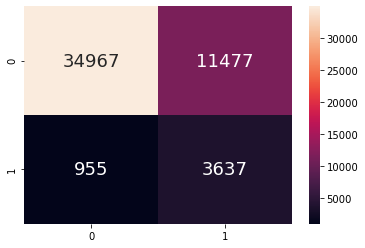

In [40]:
train_predictors = train.iloc[:,1:]
train_response = train[['HeartDiseaseorAttack']]

test_predictors = test.iloc[:,1:]
test_response = test[['HeartDiseaseorAttack']]

sm = SMOTE(sampling_strategy = 'minority')
Xsm_train, ysm_train = sm.fit_resample(train_predictors, train_response)

smote = LogisticRegression(solver='lbfgs', max_iter= 254972).fit(Xsm_train, ysm_train.values.ravel())

smote_pred = smote.predict(X_test)

# Checking accuracy
smote_score = accuracy_score(test_response, smote_pred)
print(f"Logistic Regression with SMOTE gives a score of {smote_score} for the test set.")
cm_smote = confusion_matrix(test_response, smote_pred)
sb.heatmap(cm_smote, annot = True, fmt=".0f", annot_kws={"size": 18})

In [41]:
CM_test = confusion_matrix(test_response, smote_pred)

FP = CM_test.sum(axis=0) - np.diag(CM_test)  
FN = CM_test.sum(axis=1) - np.diag(CM_test)
TP = np.diag(CM_test)
TN = CM_test.sum() - (FP + FN + TP)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

smote_tpr = TPR[1]
print(f"The true positive rate is: {smote_tpr}")

The true positive rate is: 0.7920296167247387


# Comparison of Models

Text(0.5, 1.0, 'Logistic Regression with SMOTE')

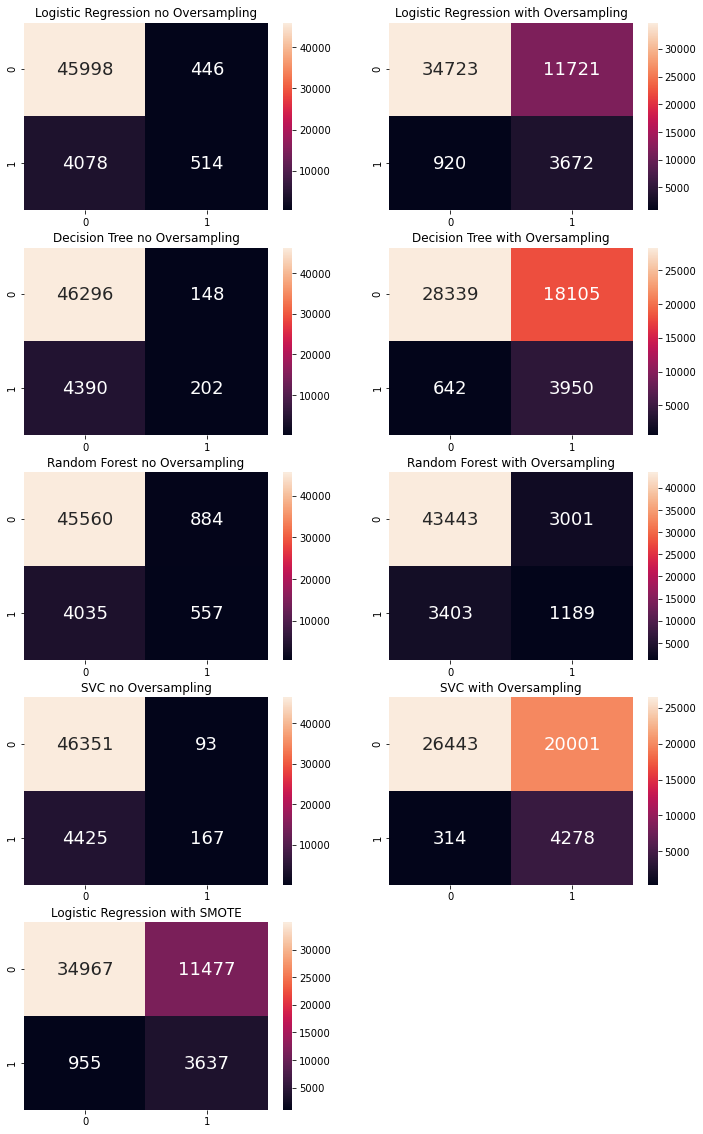

In [53]:
f, axes = plt.subplots(5, 2, figsize=(12, 20))
f.delaxes(axes[4,1])

sb.heatmap(cm_LR_noOver, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0][0])
sb.heatmap(cm_LR_over, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0][1])
sb.heatmap(cm_DT_noOver, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1][0])
sb.heatmap(cm_DT_Over, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1][1])
sb.heatmap(rf_noOver, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[2][0])
sb.heatmap(rf_Over, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[2][1])
sb.heatmap(svc_noOver, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[3][0])
sb.heatmap(svc_Over, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[3][1])
sb.heatmap(cm_smote, annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[4][0])

axes[0, 0].set_title("Logistic Regression no Oversampling")
axes[0, 1].set_title("Logistic Regression with Oversampling")
axes[1, 0].set_title("Decision Tree no Oversampling")
axes[1, 1].set_title("Decision Tree with Oversampling")
axes[2, 0].set_title("Random Forest no Oversampling")
axes[2, 1].set_title("Random Forest with Oversampling")
axes[3, 0].set_title("SVC no Oversampling")
axes[3, 1].set_title("SVC with Oversampling")
axes[4, 0].set_title("Logistic Regression with SMOTE")

In [54]:
print(f"Logistic Regression no Oversampling Classification Accuracy: {LR_noOver_score}, true positive rate is: {LR_noOver_tpr}")
print(f"Logistic Regression with Oversampling Classification Accuracy: {LR_Over_score}, true positive rate is: {LR_Over_tpr}")
print(f"Decision Tree no Oversampling Classification Accuracy: {DT_noOver_score}, true positive rate is: {DT_noOver_tpr}")
print(f"Decision Tree with Oversampling Classification Accuracy: {DT_Over_score}, true positive rate is: {DT_Over_tpr}")
print(f"Random Forest no Oversampling Classification Accuracy: {rf_noOver_score}, true positive rate is: {rf_noOver_tpr}")
print(f"Random Forest with Oversampling Classification Accuracy: {rf_Over_score}, true positive rate is: {rf_Over_tpr}")
print(f"SVC with no Oversampling Classification Accuracy: {svc_noOver_score}, true positive rate is: {svc_noOver_tpr}")
print(f"SVC with Oversampling Classification Accuracy: {svc_Over_score}, true positive rate is: {svc_Over_tpr}")
print(f"SMOTE Classification Accuracy: {smote_score}, true positive rate is: {smote_tpr}")

Logistic Regression no Oversampling Classification Accuracy: 0.9113566893957207, true positive rate is: 0.11193379790940766
Logistic Regression with Oversampling Classification Accuracy: 0.7523120934242495, true positive rate is: 0.7996515679442509
Decision Tree no Oversampling Classification Accuracy: 0.9110823732267419, true positive rate is: 0.043989547038327526
Decision Tree with Oversampling Classification Accuracy: 0.6326710557253703, true positive rate is: 0.860191637630662
Random Forest no Oversampling Classification Accuracy: 0.9036170546281056, true positive rate is: 0.12129790940766551
Random Forest with Oversampling Classification Accuracy: 0.8976408809467826, true positive rate is: 0.25892857142857145
SVC with no Oversampling Classification Accuracy: 0.9114742534681401, true positive rate is: 0.03636759581881533
SVC with Oversampling Classification Accuracy: 0.6019476447997492, true positive rate is: 0.9316202090592335
SMOTE Classification Accuracy: 0.756407241946861, true